***<h1>Regression</h1>***

In [551]:
# Importing Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 

# Model Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_predict, cross_val_score, validation_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# Preprocessing
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import learning_curve, ShuffleSplit

# Models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

from warnings import filterwarnings 
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, Lars, BayesianRidge, ARDRegression, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit, BayesianRidge, LarsCV
from sklearn.kernel_ridge import KernelRidge

df = pd.read_csv('../CA1/housing_dataset.csv')

# things to do 

# - check maybe what advantages does each state have
# - since alot of the models are similar in perfomance, we can pick a few that fits best for the situation
# add the feature selection
# put it into a pipeline 
# find out what to scale 
# check the mode

In [552]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model_test(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print("Test Set Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")


def evaluate_model_score(model, X_train, y_train):
    y_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = mean_squared_error(y_train, y_pred, squared=False)
    r2 = r2_score(y_train, y_pred)
    
    print("Training Set Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")


# def plot_learning_curve(estimator, X, y, cv, train_sizes):
#     train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='r2')
    
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
    
#     plt.figure()
#     plt.title('Learning Curve')
#     plt.xlabel('Training Examples')
#     plt.ylabel('Score')
#     plt.grid()
    
#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
#     plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
#     plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation Score')
    
#     plt.legend(loc='best')
#     return plt

def plot_learning_curve(estimator, X, y, cv, train_sizes, scoring):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation Score')
    
    plt.legend(loc='best')
    return plt


# def get_scores(model, X_train, y_train, X_test, y_test):
#     train_score = model.score(X_train, y_train)
#     test_score = model.score(X_test, y_test)
    
#     return train_score, test_score

def get_scores(model, X_train, y_train, X_test, y_test):
    # Calculate predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Calculate scores
    mae = mean_absolute_error(y_test, test_predictions)
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, test_predictions)
    
    # Create DataFrame
    scores_df = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
                              'Score': [mae, mse, rmse, r2]})
    
    return scores_df

def apply_standardscaler(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

***<h1>Data Analysis</h1>***

| Metric             | Description                                                   | Equation                                                  |
|--------------------|---------------------------------------------------------------|-----------------------------------------------------------|
| Mean Absolute Error (MAE)  | Average absolute difference between predicted and actual values | MAE = (1 / n) * ∑(|y_true - y_pred|)                          |
| Mean Squared Error (MSE)   | Average squared difference between predicted and actual values  | MSE = (1 / n) * ∑((y_true - y_pred)^2)                        |
| Root Mean Squared Error (RMSE) | Square root of the average squared difference               | RMSE = √(MSE)                                             |
| R-squared          | Proportion of the variance in the dependent variable explained by the independent variables | R^2 = 1 - (SSR / SST)   

| Metric             | Description                                                   | Equation                                                  |
|--------------------|---------------------------------------------------------------|-----------------------------------------------------------|
| Mean Absolute Error (MAE)  | Average absolute difference between predicted and actual values | MAE = (1 / n) * ∑(|y_true - y_pred|)                          |
| Mean Squared Error (MSE)   | Average squared difference between predicted and actual values  | MSE = (1 / n) * ∑((y_true - y_pred)^2)                        |
| Root Mean Squared Error (RMSE) | Square root of the average squared difference               | RMSE = √(MSE)                                             |
| R-squared          | Proportion of the variance in the dependent variable explained by the independent variables | R^2 = 1 - (SSR / SST)   |

#### Evaluation Metrics for Regression Models

- **RMSE (Root Mean Squared Error):**
  - Lower values indicate better performance.
  - Range: 0 to positive infinity.
  - A perfect score would be 0, indicating a perfect match between the predicted and actual values.

- **MAE (Mean Absolute Error):**
  - Lower values indicate better performance.
  - Range: 0 to positive infinity.
  - A perfect score would be 0, indicating a perfect match between the predicted and actual values.

- **MSE (Mean Squared Error):**
  - Lower values indicate better performance.
  - Range: 0 to positive infinity.
  - A perfect score would be 0, indicating a perfect match between the predicted and actual values.

- **R^2 (Coefficient of Determination):**
  - Range: -∞ to 1.
  - A score of 1 indicates a perfect fit.
  - A score of 0 indicates that the model performs no better than predicting the mean of the target variable.
  - Negative scores indicate that the model performs worse than predicting the mean.

In [296]:
df

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000
...,...,...,...,...,...,...,...,...
540,540,Seattle,300.0,2,1,1,unfurnished,182000
541,541,New York,240.0,3,1,1,semi-furnished,176715
542,542,Boston,362.0,2,1,1,unfurnished,175000
543,543,Seattle,291.0,3,1,1,furnished,175000


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


In [553]:
df = pd.read_csv('../CA1/housing_dataset.csv')
df = df.drop('House ID', axis=1)


<h3>Univariate Analysis</h3>

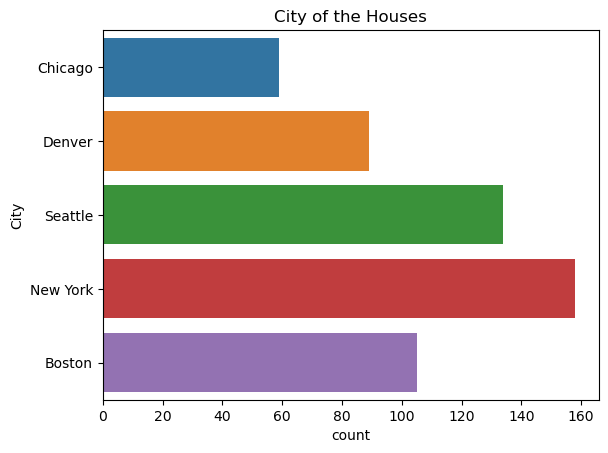

In [299]:
# change the color
sns.countplot(y = df['City'])
plt.title('City of the Houses')
plt.show()

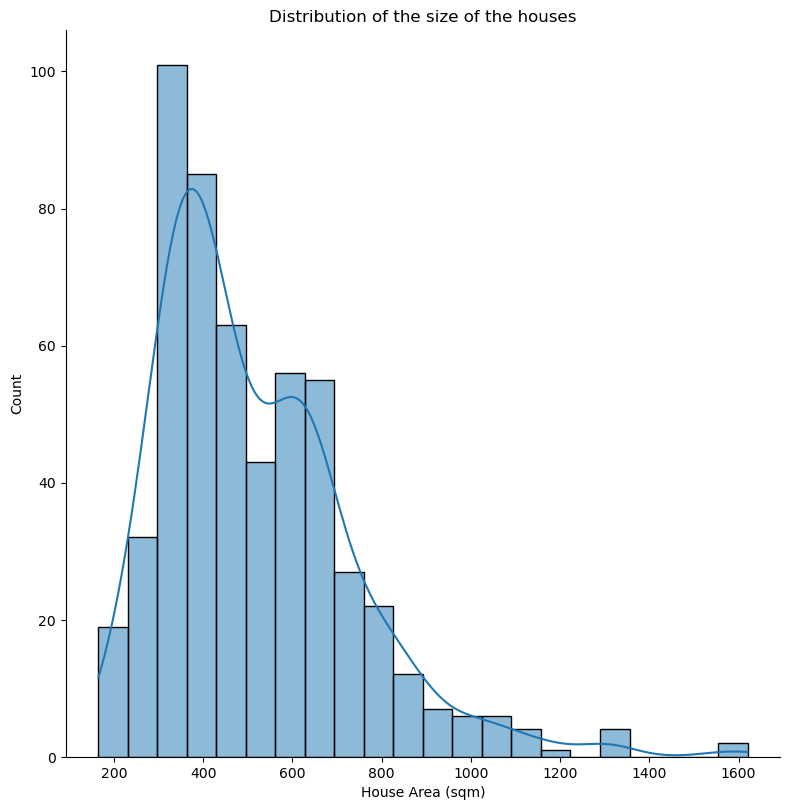

In [300]:
sns.displot(x='House Area (sqm)', kde=True, height=8, data=df)
plt.title('Distribution of the size of the houses')
plt.show()


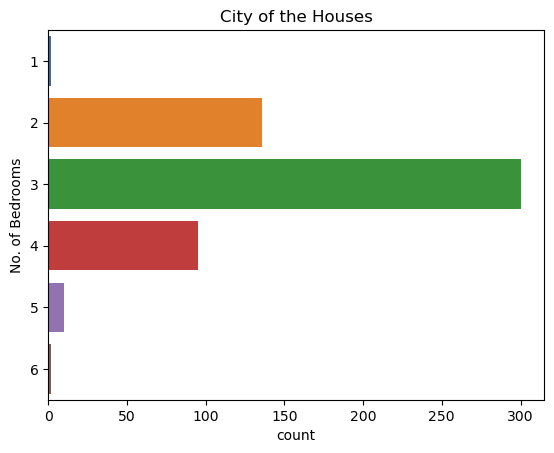

In [301]:
# change the color
sns.countplot(y = df['No. of Bedrooms'])
plt.title('City of the Houses')
plt.show()

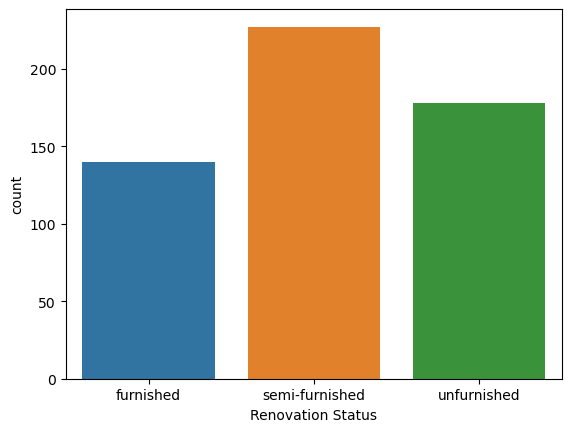

In [302]:
# change the color
sns.countplot(x = 'Renovation Status', data = df)
plt.show()

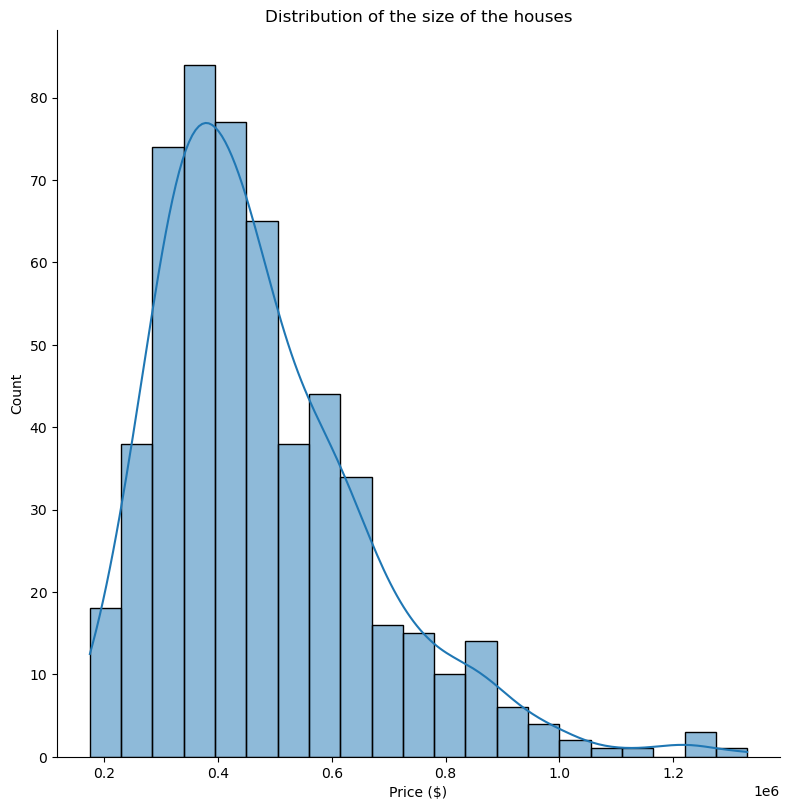

In [303]:
sns.displot(x='Price ($)', kde=True, height=8, data=df)
plt.title('Distribution of the size of the houses')
plt.show()

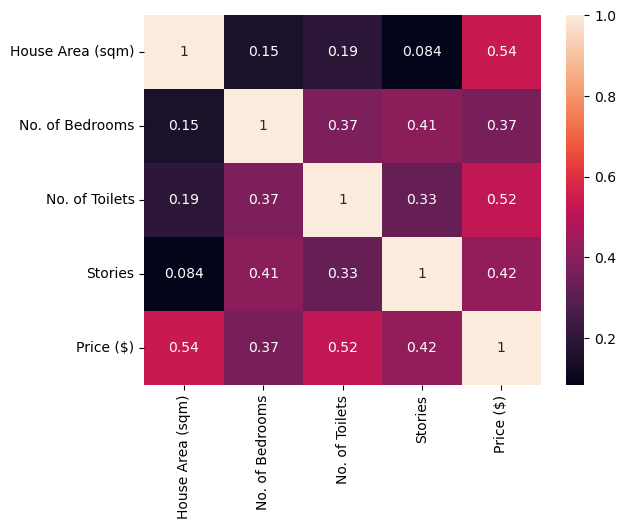

In [304]:
corr = df.corr()

sns.heatmap(corr, annot=True)   
plt.show()

<h3>Bivariate Analysis</h3>

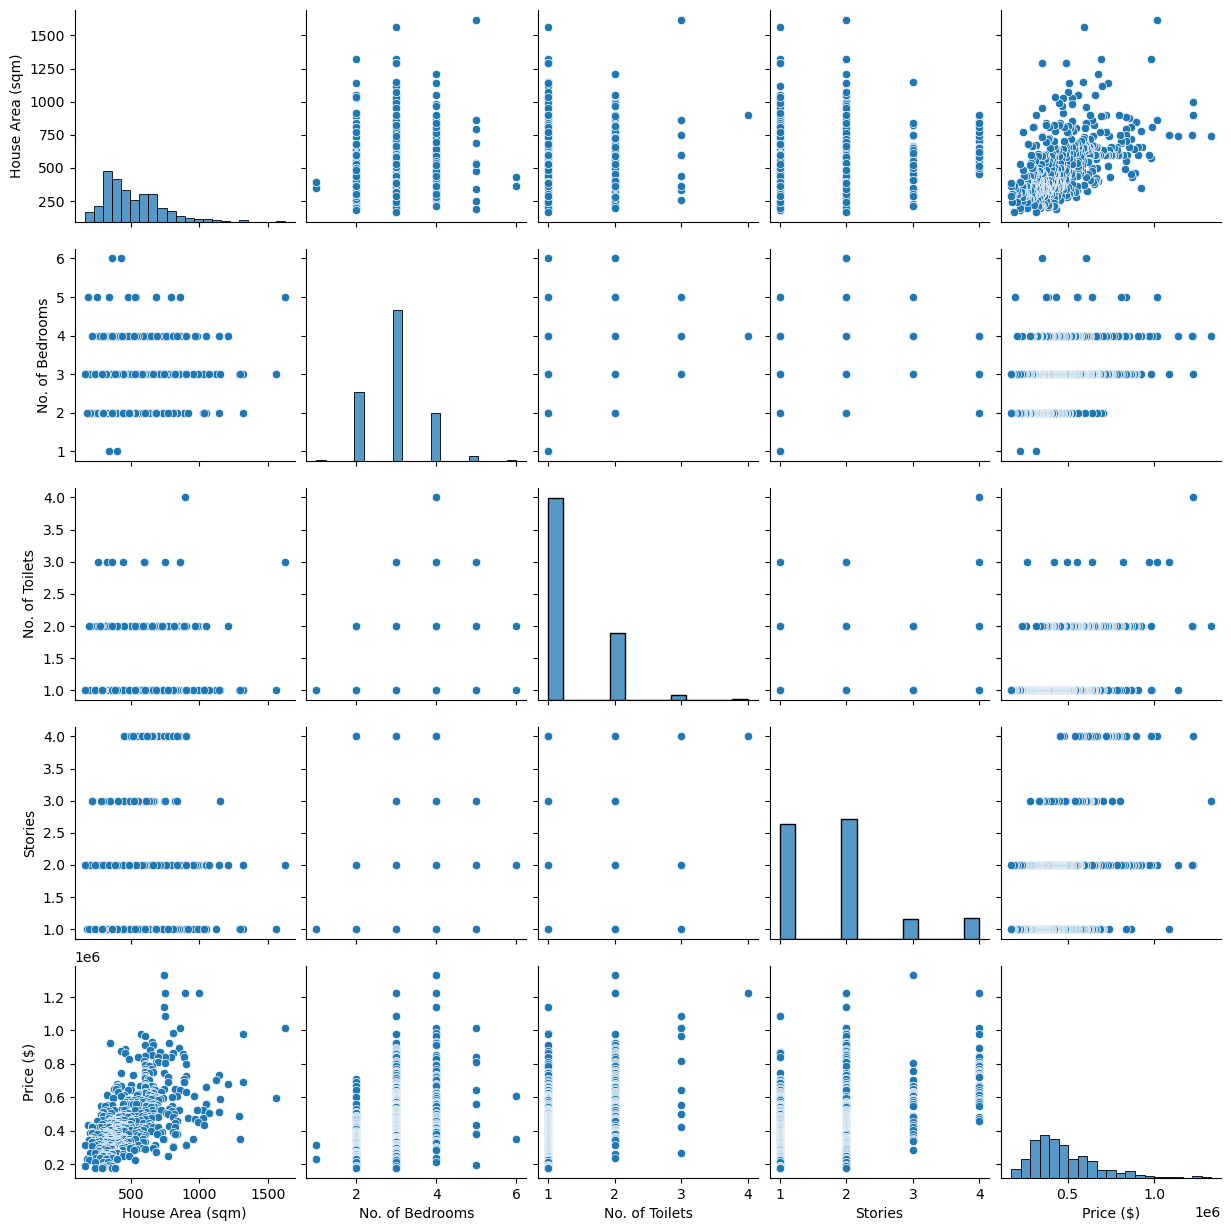

In [305]:
sns.pairplot(data = df)
plt.show()

In [306]:
df

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,Chicago,742.0,4,2,3,furnished,1330000
1,Denver,896.0,4,4,4,furnished,1225000
2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,Seattle,750.0,4,2,2,furnished,1221500
4,New York,742.0,4,1,2,furnished,1141000
...,...,...,...,...,...,...,...
540,Seattle,300.0,2,1,1,unfurnished,182000
541,New York,240.0,3,1,1,semi-furnished,176715
542,Boston,362.0,2,1,1,unfurnished,175000
543,Seattle,291.0,3,1,1,furnished,175000


<h1>Data preprocessing</h1>

<h3>Encoding</h3>

In [554]:
df = pd.read_csv('../CA1/housing_dataset.csv')
df = df.drop('House ID', axis=1)

print("values and its Encoded counterpart")
print()
# Using Ordinal Encoder to encode the Renovation Status column since the renvation status is ordinal
renovation_status = df['Renovation Status'].values.reshape(-1, 1)

encoder = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']])
encoded_renovation_status = encoder.fit_transform(renovation_status)
df['Renovation Status'] = encoded_renovation_status.flatten()
# df.drop('Renovation Status Encoded', axis=1, inplace=True)
df

# check if the value and encoded thing is the right order
original_values = encoder.inverse_transform(encoded_renovation_status)
unique_original_values = pd.unique(original_values.flatten())

# Create a dictionary to map the unique original values to their encoded values
mapping = {value: index for index, value in enumerate(unique_original_values[::-1])}

# Create a DataFrame to display the unique original values and their corresponding encoded values
for value in unique_original_values:
    encoded_value = format(mapping[value], ".1f")
    print(f"{value} - {encoded_value}")


print()

unique_values = df['City'].unique()
# print(unique_values)

# use label encoder to encode the cities in the dataframe since there are only 5 cities
encoder = LabelEncoder()
categorical_column = 'City'
unique_values = df[categorical_column].unique()

df[categorical_column] = encoder.fit_transform(df[categorical_column])
category = encoder.classes_
codes = encoder.transform(category)

for i, category in enumerate(category):
    print(f"{category} - {codes[i]}")


values and its Encoded counterpart

furnished - 2.0
semi-furnished - 1.0
unfurnished - 0.0

Boston - 0
Chicago - 1
Denver - 2
New York - 3
Seattle - 4


<h3>Feature Engineering</h3>
i decided to drop the House ID column as it is not relevant to the model

In [308]:
# df = df.drop('House ID', axis=1)



,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,1,742.0,4,2,3,2.0,1330000
1,2,896.0,4,4,4,2.0,1225000
2,1,996.0,3,2,2,1.0,1225000
3,4,750.0,4,2,2,2.0,1221500
4,3,742.0,4,1,2,2.0,1141000
...,...,...,...,...,...,...,...
540,4,300.0,2,1,1,0.0,182000
541,3,240.0,3,1,1,1.0,176715
542,0,362.0,2,1,1,0.0,175000
543,4,291.0,3,1,1,2.0,175000


In [309]:
def convert_columns_to_int(df, columns):
    for column in columns:
        df[column] = df[column].astype(int)
    
# df['city'] = df['Column1'].astype(int)

columns_to_convert = ['City', 'Renovation Status']
convert_columns_to_int(df, columns_to_convert)

numeric_columns = df.select_dtypes(include='number').columns

# Count the number of numeric values in each column
numeric_value_counts = df[numeric_columns].count()


print(numeric_value_counts)
df.info()


City                 545
House Area (sqm)     545
No. of Bedrooms      545
No. of Toilets       545
Stories              545
Renovation Status    545
Price ($)            545
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               545 non-null    int32  
 1   House Area (sqm)   545 non-null    float64
 2   No. of Bedrooms    545 non-null    int64  
 3   No. of Toilets     545 non-null    int64  
 4   Stories            545 non-null    int64  
 5   Renovation Status  545 non-null    int32  
 6   Price ($)          545 non-null    int64  
dtypes: float64(1), int32(2), int64(4)
memory usage: 25.7 KB


*<h3>Standardization</h3>*

In [548]:
from sklearn.compose import make_column_transformer

columns_to_scale = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets','Stories', 'Price ($)']
columns_to_log_transform = ['Price ($)']
original_columns = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets','Stories', 'Price ($)', 'city', 'Renovation Status']

scaler = MinMaxScaler()
scaler2 = MaxAbsScaler()
scaler3 = PowerTransformer(method='yeo-johnson', standardize=True)
scaler4 = QuantileTransformer(output_distribution='uniform', random_state=1)
scaler5 = QuantileTransformer(output_distribution='normal', random_state=1)
# data_log = np.log(df[columns_to_log_transform])
scaler6 = StandardScaler()

# scaler.fit(df[columns_to_scale])
# scaler2.fit(df[columns_to_scale])
#  scaler3.fit(df[columns_to_scale])
# scaler4.fit(df[columns_to_scale])
# scaler5.fit(df[columns_to_scale])

df_scaled7 = df.copy()

ct = make_column_transformer(
    (StandardScaler(), columns_to_scale),
    remainder='passthrough'
)

df_scaled7 = ct.fit_transform(df_scaled7)

df_scaled = df.copy()
df_scaled2 = df.copy()
df_scaled3 = df.copy()
df_scaled4 = df.copy()
df_scaled5 = df.copy() 
df_scaled6 = df.copy()
# df_scaled7 = df.copy()

# df_scaled[columns_to_scale] = scaler.transform(df[columns_to_scale])

# df_scaled2[columns_to_scale] = scaler2.transform(df[columns_to_scale])

# df_scaled3[columns_to_scale] = data_log

# df_scaled4[columns_to_scale] = scaler3.transform(df[columns_to_scale])

# df_scaled5[columns_to_scale] = scaler4.transform(df[columns_to_scale])

# df_scaled6[columns_to_scale] = scaler5.transform(df[columns_to_scale])

# scaled_data = scaler.fit_transform(df[columns_to_scale])

# df_scaled7 = pd.DataFrame(df_scaled7, columns=columns_to_scale)

# df_scaled7 = pd.concat([df.drop(columns_to_scale, axis=1), df_scaled7], axis=1)

# df_scaled

X_scaled_df = pd.DataFrame(df_scaled7, columns=original_columns)
# X_scaled_df[columns_to_log_transform] = data_log

# X_scaled_df = X_scaled_df[df.columns]
# X_transformed = pd.DataFrame(ct.transform(df), columns=df.columns, index=df.index)


In [549]:
columns_to_scale = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets','Stories', 'Price ($)']
original_columns = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets','Stories', 'Price ($)', 'city', 'Renovation Status']
scaler6 = StandardScaler()

ct = make_column_transformer(
    (StandardScaler(), columns_to_scale),
    remainder='passthrough'
)

df_scaled7 = ct.fit_transform(df_scaled7)

X_scaled_df = pd.DataFrame(df_scaled7, columns=original_columns)


In [433]:
X_scaled_df

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($),city,Renovation Status
0,1.046726,1.403419,1.421812,1.378217,4.566365,1.0,2.0
1,1.757010,1.403419,5.405809,2.532024,4.004484,2.0,2.0
2,2.218232,0.047278,1.421812,0.224410,4.004484,1.0,1.0
3,1.083624,1.403419,1.421812,0.224410,3.985755,4.0,2.0
4,1.046726,1.403419,-0.570187,0.224410,3.554979,3.0,2.0
...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,-1.576868,4.0,0.0
541,-1.268613,0.047278,-0.570187,-0.929397,-1.605149,3.0,1.0
542,-0.705921,-1.308863,-0.570187,-0.929397,-1.614327,0.0,0.0
543,-1.033389,0.047278,-0.570187,-0.929397,-1.614327,4.0,2.0


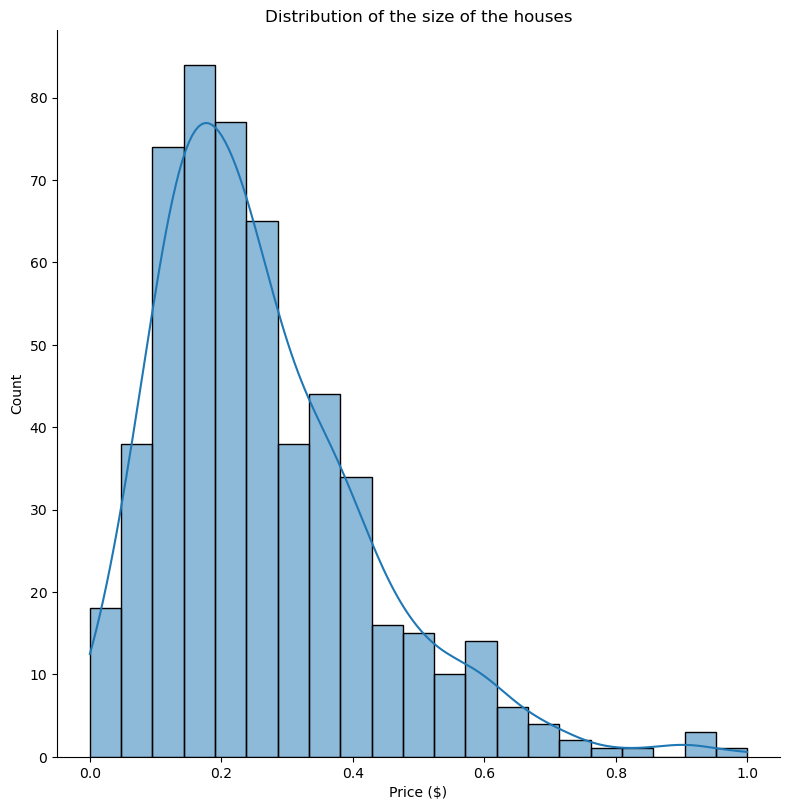

In [312]:
df_scaled
sns.displot(x='Price ($)', kde=True, height=8, data=df_scaled)
plt.title('Distribution of the size of the houses')
plt.show()

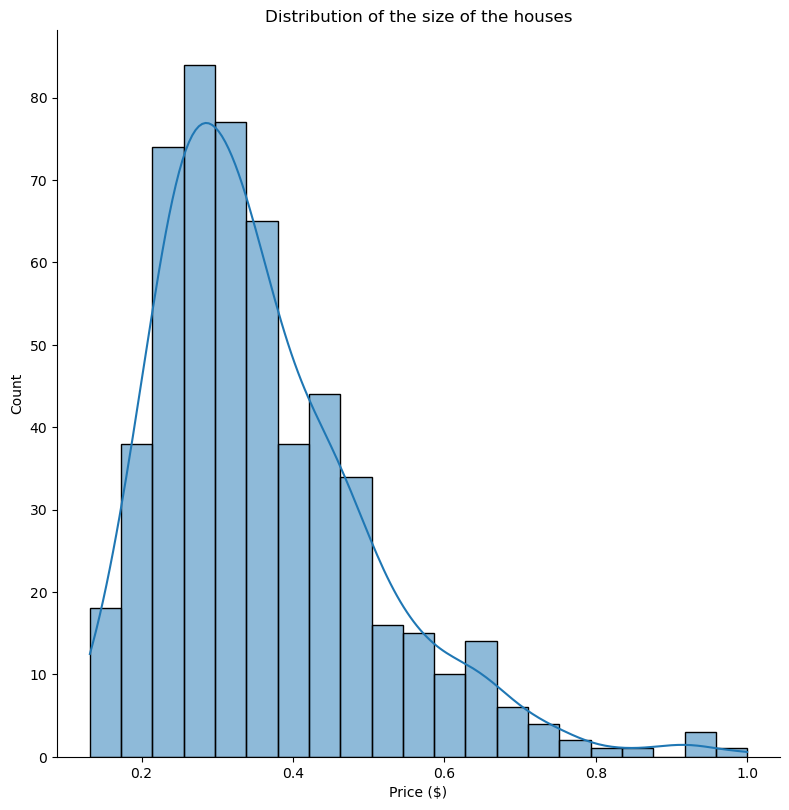

In [313]:
df_scaled
sns.displot(x='Price ($)', kde=True, height=8, data=df_scaled2)
plt.title('Distribution of the size of the houses')
plt.show()

In [314]:
X = df_scaled[['City', 'House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'Stories','Renovation Status' ]]  # Add more columns as needed
y = df_scaled['Price ($)']

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()

# r_squared = result.rsquared

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
# VIF = 1 / (1 - R^2)
vif["VIF"] = 1 / (1 - result.rsquared_adj)

print(vif)

            Variable       VIF
0              const  2.241153
1               City  2.241153
2   House Area (sqm)  2.241153
3    No. of Bedrooms  2.241153
4     No. of Toilets  2.241153
5            Stories  2.241153
6  Renovation Status  2.241153


In [315]:
import numpy as np
import pandas as pd
from numpy.linalg import eigvals

# Assuming you have a dataframe `df` containing your independent variables

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Calculate the eigenvalues of the correlation matrix
eigenvalues = eigvals(correlation_matrix)

# Calculate the condition number
condition_number = np.max(eigenvalues) / np.min(eigenvalues)

# Print the eigenvalues and condition number
print("Eigenvalues:")
print(eigenvalues)
print("Condition Number:", condition_number)

Eigenvalues:
[2.5013615  0.29932008 1.10668614 0.98967353 0.85571312 0.59121287
 0.65603276]
Condition Number: 8.3568114171761


In [555]:
from sklearn.model_selection import train_test_split
# df = pd.read_csv('../CA1/housing_dataset.csv')

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Price ($)'], axis=1)  # Features
y = df[['Price ($)']]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = X_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Verify the shape of the training and testing sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (436, 6)
X_test shape: (109, 6)
y_train shape: (436, 1)
y_test shape: (109, 1)


,Price ($)
0,752500
1,630000
2,392000
3,343000
4,301000
...,...
431,675500
432,616000
433,434000
434,329000


In [558]:
feature_columns = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'Stories']
target_column = ['Price ($)']
additional_columns = ['city', 'Renovation Status']

feature_scaler = StandardScaler()

feature_ct = ColumnTransformer([
    ('feature_scaler', feature_scaler, feature_columns)
], remainder='passthrough')

# Create the pipeline for feature scaling
feature_pipeline = Pipeline([
    ('preprocessor', feature_ct)
])

# Apply the feature scaling pipeline to the train dataset
X_train_scaled = feature_pipeline.fit_transform(X_train)

# Apply the feature scaling pipeline to the test dataset
X_test_scaled = feature_pipeline.transform(X_test)

# Create the column transformer for target scaling
target_scaler = StandardScaler()
target_ct = ColumnTransformer([
    ('target_scaler', target_scaler, target_column)
], remainder='passthrough')

# Apply the target scaling column transformer to the train dataset
y_train_scaled = target_ct.fit_transform(y_train)

# Apply the target scaling column transformer to the test dataset
y_test_scaled = target_ct.transform(y_test)

# Convert the scaled data back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns + additional_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_columns + additional_columns)
y_train_scaled_df = pd.DataFrame(y_train_scaled, columns=target_column)
y_test_scaled_df = pd.DataFrame(y_test_scaled, columns=target_column)

In [559]:
X_train


,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status
0,3,600.0,3,2,4,2.0
1,2,720.0,3,2,1,1.0
2,1,381.6,2,1,1,2.0
3,0,261.0,3,1,2,0.0
4,4,375.0,3,1,2,0.0
...,...,...,...,...,...,...
431,0,600.0,4,2,4,0.0
432,4,545.0,4,2,1,1.0
433,4,450.0,3,2,3,2.0
434,3,404.0,2,1,1,0.0


In [561]:
y_train_scaled_df

,Price ($)
0,1.605090
1,0.907466
2,-0.447919
3,-0.726969
4,-0.966154
...,...
431,1.166583
432,0.827737
433,-0.208733
434,-0.806697


In [318]:
# import sklearn
# sklearn.metrics.get_scorer_names()

R2
 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2
 is negative. Note that R2
 is not always the square of anything, so it can have a negative value without violating any rules of math. R2
 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

Example: fit data to a linear regression model constrained so that the Y
 intercept must equal 1500
.

**<h2>Model Selection</h2>**

In [542]:
from sklearn.metrics import SCORERS

# Print the list of available scoring metrics
for metric in sorted(SCORERS.keys()):
    print(metric)

accuracy
adjusted_mutual_info_score
adjusted_rand_score
average_precision
balanced_accuracy
completeness_score
explained_variance
f1
f1_macro
f1_micro
f1_samples
f1_weighted
fowlkes_mallows_score
homogeneity_score
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted
matthews_corrcoef
max_error
mutual_info_score
neg_brier_score
neg_log_loss
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_gamma_deviance
neg_mean_poisson_deviance
neg_mean_squared_error
neg_mean_squared_log_error
neg_median_absolute_error
neg_negative_likelihood_ratio
neg_root_mean_squared_error
normalized_mutual_info_score
positive_likelihood_ratio
precision
precision_macro
precision_micro
precision_samples
precision_weighted
r2
rand_score
recall
recall_macro
recall_micro
recall_samples
recall_weighted
roc_auc
roc_auc_ovo
roc_auc_ovo_weighted
roc_auc_ovr
roc_auc_ovr_weighted
top_k_accuracy
v_measure_score


In [319]:
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Step 1: Scaler
#     ('regressor', DummyRegressor())  # Step 2: Regression model
# ])

# pipeline.fit(X_train, y_train)
# predictions = pipeline.predict(X_test)


In [563]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer, mean_squared_error
results_df = pd.DataFrame()

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'MLPRegressor': MLPRegressor(),
    'GaussianProcessRegressor': GaussianProcessRegressor(),
    # 'GradientBoostingRegressor': GradientBoostingRegressor(),
    'HuberRegressor': HuberRegressor(),
    'theil-sen regressor': TheilSenRegressor(),
    'passive-aggressive regressor': PassiveAggressiveRegressor(),
    'ransac regressor': RANSACRegressor(),
    'automatic relevance determination': ARDRegression(),
    'ortogonal matching pursuit': OrthogonalMatchingPursuit(),
    'bayesian ridge': BayesianRidge(),
    'kernel ridge': KernelRidge(),
    'larscv': LarsCV(),
}

# def rmse_scorer(y_true, y_pred):
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     return rmse

# def mean_absolute_percentage_error(y_true, y_pred):
#     mask = y_true != 0  # Create a mask to exclude zero values
#     y_true = y_true[mask]
#     y_pred = y_pred[mask]
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2', rmse_scorer]

# for name in models:
#     model = models[name]
#     cv_results_train = cross_validate(model, X_train, y_train, scoring=scoring, cv=5)
#     cv_results_test = cross_validate(model, X_test, y_test, scoring=scoring, cv=5)
    
#     for metric in scoring:
#         for score_train, score_test in zip(cv_results_train['test_{}'.format(metric)], cv_results_test['test_{}'.format(metric)]):
#             if metric == 'neg_mean_squared_error':
#                 score_train = -score_train  # Convert negative MSE to positive RMSE
#                 score_test = -score_test
#             if metric == 'neg_mean_absolute_error':
#                 score_train = -score_train  # Convert negative MAE to positive MAE
#                 score_test = -score_test
#             results_df = results_df.append({'model': name, 'Dataset': 'Train', 'metric': metric, 'score': score_train}, ignore_index=True)
#             results_df = results_df.append({'model': name, 'Dataset': 'Test', 'metric': metric, 'score': score_test}, ignore_index=True)


# scoring = {
#     'RMSE': make_scorer(rmse_scorer),
#     'MAE': 'neg_mean_absolute_error',
#     'MSE': 'neg_mean_squared_error',
#     'R^2': 'r2'
# }

scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'R^2': 'r2',
    'MAPE': 'neg_mean_absolute_percentage_error'

}

# for name in models:
#     model = models[name]
#     cv_results_train = cross_validate(model, X_train, y_train, scoring=scoring, cv=5)
#     cv_results_test = cross_validate(model, X_test, y_test, scoring=scoring, cv=5)
    
#     for metric in scoring:
#         for score_train, score_test in zip(cv_results_train['test_{}'.format(metric)], cv_results_test['test_{}'.format(metric)]):
#             results_df = results_df.append({'model': name, 'Dataset': 'Train', 'metric': metric, 'score': score_train}, ignore_index=True)
#             results_df = results_df.append({'model': name, 'Dataset': 'Test', 'metric': metric, 'score': score_test}, ignore_index=True)

for name in models:
    model = models[name]
    cv_results = cross_validate(model, X_train_scaled_df, y_train_scaled_df, scoring=scoring, cv=5, return_train_score=True)
    
    for metric in scoring:
        for score_train, score_test in zip(cv_results['train_{}'.format(metric)], cv_results['test_{}'.format(metric)]):
            results_df = results_df.append({'model': name, 'Dataset': 'Train', 'metric': metric, 'score': score_train}, ignore_index=True)
            results_df = results_df.append({'model': name, 'Dataset': 'Test', 'metric': metric, 'score': score_test}, ignore_index=True)


# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

results_df


,model,Dataset,metric,score
0,Linear Regression,Train,RMSE,-0.652588
1,Linear Regression,Test,RMSE,-0.694090
2,Linear Regression,Train,RMSE,-0.659294
3,Linear Regression,Test,RMSE,-0.662776
4,Linear Regression,Train,RMSE,-0.688718
...,...,...,...,...
895,larscv,Test,MAPE,-1.232039
896,larscv,Train,MAPE,-1.775115
897,larscv,Test,MAPE,-1.875914
898,larscv,Train,MAPE,-1.971568


In [564]:
results_pivot = results_df.pivot_table(index='model', columns=['metric', 'Dataset'], values='score')

results_pivot

metric                                   MAE                  MAPE            \
Dataset                                 Test     Train        Test     Train   
model                                                                          
Elastic Net                        -0.752796 -0.749590   -0.980297 -1.001670   
GaussianProcessRegressor          -82.729574 -0.023966 -368.652821 -0.091157   
Gradient Boosting                  -0.501398 -0.312549   -1.763600 -1.124090   
HuberRegressor                     -0.489963 -0.477445   -1.846510 -1.803624   
Lasso                              -0.771090 -0.768969   -1.008469 -1.019552   
Linear Regression                  -0.493329 -0.479787   -1.869105 -1.835233   
MLPRegressor                       -0.493322 -0.410958   -2.057507 -1.736569   
Random Forest                      -0.509981 -0.189929   -1.736048 -0.651127   
Ridge                              -0.493225 -0.479770   -1.866449 -1.832817   
Support Vector Regression          -0.498437 -0.416494   -1.798252 -1.523380   
automatic relevance determination  -0.491770 -0.479139   -1.843447 -1.820803   
bayesian ridge                     -0.492736 -0.479709   -1.851214 -1.818977   
kernel ridge                       -0.501514 -0.487252   -1.908353 -1.876963   
larscv                             -0.491537 -0.479639   -1.808341 -1.780344   
ortogonal matching pursuit         -0.652200 -0.626997   -1.905761 -1.789344   
passive-aggressive regressor       -0.666414 -0.646041   -3.297203 -2.532332   
ransac regressor                   -0.515135 -0.525952   -1.759607 -1.825171   
theil-sen regressor                -0.493102 -0.482372   -1.774143 -1.755597   

metric                                       MSE                  RMSE  \
Dataset                                     Test     Train        Test   
model                                                                    
Elastic Net                            -0.973898 -0.953876   -0.978043   
GaussianProcessRegressor          -100937.732432 -0.006624 -269.405498   
Gradient Boosting                      -0.487096 -0.174781   -0.692204   
HuberRegressor                         -0.459301 -0.436955   -0.672755   
Lasso                                  -1.006571 -0.999199   -0.995771   
Linear Regression                      -0.459132 -0.431834   -0.673711   
MLPRegressor                           -0.457177 -0.314045   -0.671441   
Random Forest                          -0.507879 -0.068207   -0.707535   
Ridge                                  -0.459044 -0.431837   -0.673621   
Support Vector Regression              -0.506829 -0.382977   -0.703935   
automatic relevance determination      -0.457842 -0.432557   -0.672500   
bayesian ridge                         -0.458650 -0.431952   -0.673184   
kernel ridge                           -0.466466 -0.442021   -0.679757   
larscv                                 -0.456864 -0.433920   -0.671367   
ortogonal matching pursuit             -0.791297 -0.698113   -0.884977   
passive-aggressive regressor           -0.770199 -0.724479   -0.859123   
ransac regressor                       -0.522106 -0.564211   -0.716186   
theil-sen regressor                    -0.461252 -0.442593   -0.675467   

metric                                                R^2            
Dataset                               Train          Test     Train  
model                                                                
Elastic Net                       -0.976487      0.009687  0.044106  
GaussianProcessRegressor          -0.080777 -93015.696929  0.993315  
Gradient Boosting                 -0.417906      0.492627  0.824773  
HuberRegressor                    -0.660800      0.527602  0.562522  
Lasso                             -0.999197     -0.031199  0.000000  
Linear Regression                 -0.656902      0.523163  0.567687  
MLPRegressor                      -0.560107      0.527524  0.685673  
Random Forest                     -0.260963      0.473397  0.931

In [565]:
results_pivot.columns

metrics = ['RMSE', 'MAE', 'MSE','MAPE', 'R^2']

# Create an empty DataFrame to store the results
top_models_df = pd.DataFrame(columns=['metric', 'Dataset', 'model', 'score'])

# Find the top 3 models with the lowest values for RMSE, MAE, and MSE
for metric in metrics[:4]:
    lowest_3_models = results_pivot[metric]['Test'].nlargest(5)
    for model, score in lowest_3_models.items():
        top_models_df = top_models_df.append({
            'metric': metric,
            'Dataset': 'Test',
            'model': model,
            'score': score
        }, ignore_index=True)
        
    lowest_3_models = results_pivot[metric]['Train'].nlargest(5)
    for model, score in lowest_3_models.items():
        top_models_df = top_models_df.append({
            'metric': metric,
            'Dataset': 'Train',
            'model': model,
            'score': score
        }, ignore_index=True)

# Find the top 3 models with the highest values for R^2
highest_3_models = results_pivot['R^2']['Test'].nlargest(3)
for model, score in highest_3_models.items():
    top_models_df = top_models_df.append({
        'metric': 'R^2',
        'Dataset': 'Test',
        'model': model,
        'score': score
    }, ignore_index=True)

highest_3_models = results_pivot['R^2']['Train'].nlargest(3)
for model, score in highest_3_models.items():
    top_models_df = top_models_df.append({
        'metric': 'R^2',
        'Dataset': 'Train',
        'model': model,
        'score': score
    }, ignore_index=True)
# ---------------------------------------------------------------
# for metric in metrics[:4]:
#     lowest_3_models = results_pivot[metric]['Test'].nlargest(3)
#     for model, score in lowest_3_models.items():
#         top_models_df = top_models_df.append({
#             'metric': metric,
#             'Dataset': 'Test',
#             'model': model,
#             'score': score
#         }, ignore_index=True)
        
#     lowest_3_models = results_pivot[metric]['Train'].nlargest(3)
#     for model, score in lowest_3_models.items():
#         top_models_df = top_models_df.append({
#             'metric': metric,
#             'Dataset': 'Train',
#             'model': model,
#             'score': score
#         }, ignore_index=True)

# # Find the top 3 models with the highest values for R^2 and MAPE
# highest_3_models = results_pivot['R^2']['Test'].nlargest(3)
# for model, score in highest_3_models.items():
#     top_models_df = top_models_df.append({
#         'metric': 'R^2',
#         'Dataset': 'Test',
#         'model': model,
#         'score': score
#     }, ignore_index=True)

# highest_3_models = results_pivot['R^2']['Train'].nlargest(3)
# for model, score in highest_3_models.items():
#     top_models_df = top_models_df.append({
#         'metric': 'R^2',
#         'Dataset': 'Train',
#         'model': model,
#         'score': score
#     }, ignore_index=True)

# highest_3_models_mape = results_pivot['MAPE']['Test'].nsmallest(3)
# for model, score in highest_3_models_mape.items():
#     top_models_df = top_models_df.append({
#         'metric': 'MAPE',
#         'Dataset': 'Test',
#         'model': model,
#         'score': score
#     }, ignore_index=True)

# highest_3_models_mape = results_pivot['MAPE']['Train'].nsmallest(3)
# for model, score in highest_3_models_mape.items():
#     top_models_df = top_models_df.append({
#         'metric': 'MAPE',
#         'Dataset': 'Train',
#         'model': model,
#         'score': score
#     }, ignore_index=True)

# Styling the DataFrame
# styled_top_models_df = top_models_df.style.set_properties(subset=pd.IndexSlice[2::3], **{'border-top': '10px solid black'})

top_models_df
# Display the styled DataFrame
# top_models_df
# styled_top_models_df
# top_3_results = top_3_results.fillna('-')

# # Reset the index and transpose the DataFrame
# top_3_results = top_3_results.transpose()

# top_3_results
# styled_top_models_df


,metric,Dataset,model,score
0,RMSE,Test,larscv,-0.671367
1,RMSE,Test,MLPRegressor,-0.671441
2,RMSE,Test,automatic relevance determination,-0.672500
3,RMSE,Test,HuberRegressor,-0.672755
4,RMSE,Test,bayesian ridge,-0.673184
5,RMSE,Train,GaussianProcessRegressor,-0.080777
6,RMSE,Train,Random Forest,-0.260963
7,RMSE,Train,Gradient Boosting,-0.417906
8,RMSE,Train,MLPRegressor,-0.560107
9,RMSE,Train,Support Vector Regression,-0.618661


In [438]:
# model = LinearRegression()

# # Perform cross-validation and get scores
# scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
# cv_results = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)

# # Extract the scores
# train_mse_scores = cv_results['train_neg_mean_squared_error']
# test_mse_scores = cv_results['test_neg_mean_squared_error']
# train_mae_scores = cv_results['train_neg_mean_absolute_error']
# test_mae_scores = cv_results['test_neg_mean_absolute_error']
# train_r2_scores = cv_results['train_r2']
# test_r2_scores = cv_results['test_r2']

# # Print the scores
# print("Train MSE scores:", np.mean(train_mse_scores))
# print("Test MSE scores:", np.mean(test_mse_scores))
# print("Train MAE scores:", np.mean(train_mae_scores))
# print("Test MAE scores:", np.mean(test_mae_scores))
# print("Train R^2 scores:", np.mean(train_r2_scores))
# print("Test R^2 scores:", np.mean(test_r2_scores))

# print("Train MSE scores:", (train_mse_scores))
# print("Test MSE scores:", (test_mse_scores))
# print("Train MAE scores:", (train_mae_scores))
# print("Test MAE scores:", (test_mae_scores))
# print("Train R^2 scores:", (train_r2_scores))
# print("Test R^2 scores:", (test_r2_scores))

In [447]:
# model = BayesianRidge()

# # Fit the model to the training data
# # model = LinearRegression()

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Predict on the training data
# y_train_pred = model.predict(X_train)

# # Predict on the test data
# y_test_pred = model.predict(X_test)

# # Calculate the evaluation metrics for train set
# mae_train = mean_absolute_error(y_train, y_train_pred)
# mse_train = mean_squared_error(y_train, y_train_pred)
# rmse_train = np.sqrt(mse_train)
# r2_train = r2_score(y_train, y_train_pred)

# # Calculate the evaluation metrics for test set
# mae_test = mean_absolute_error(y_test, y_test_pred)
# mse_test = mean_squared_error(y_test, y_test_pred)
# rmse_test = np.sqrt(mse_test)
# r2_test = r2_score(y_test, y_test_pred)

# # Print the scores
# print("Linear Regression Model")
# print("Train Scores:")
# print("MAE:", mae_train)
# print("MSE:", mse_train)
# print("RMSE:", rmse_train)
# print("R2:", r2_train)
# print("\nTest Scores:")
# print("MAE:", mae_test)
# print("MSE:", mse_test)
# print("RMSE:", rmse_test)
# print("R2:", r2_test)

# mae = mean_absolute_error(true_labels, predicted_labels)
# print("MAE:", mae)

# # Calculate MSE
# mse = mean_squared_error(true_labels, predicted_labels)
# print("MSE:", mse)

# # Calculate R^2
# r2 = r2_score(true_labels, predicted_labels)
# print("R^2:", r2)

# # Calculate RMSE
# rmse = np.sqrt(mse)
# print("RMSE:", rmse)

In [449]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are your training data

# Create a linear regression model
model = LinearRegression()

# Create the RFE object with the desired number of features to select
num_features = 5  # Number of features to select
rfe = RFE(model, n_features_to_select=num_features)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'Stories',
       'city', 'Renovation Status'],
      dtype='object')


,Metric,Score
0,MAE,0.620025
1,MSE,0.696867
2,RMSE,0.834786
3,R2,0.518545


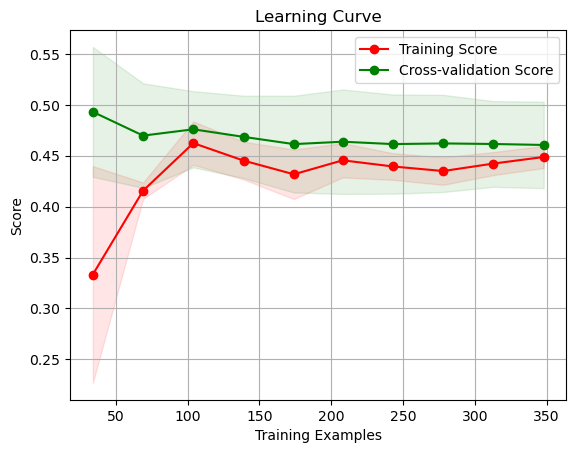

In [464]:
model = HuberRegressor()

model.fit(X_train, y_train)

scores = get_scores(model, X_train, y_train, X_test, y_test)

plot_learning_curve(model, X_train, y_train,cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring = make_scorer(mean_absolute_error, greater_is_better=True))
scores

<module 'matplotlib.pyplot' from 'c:\\Users\\khood\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

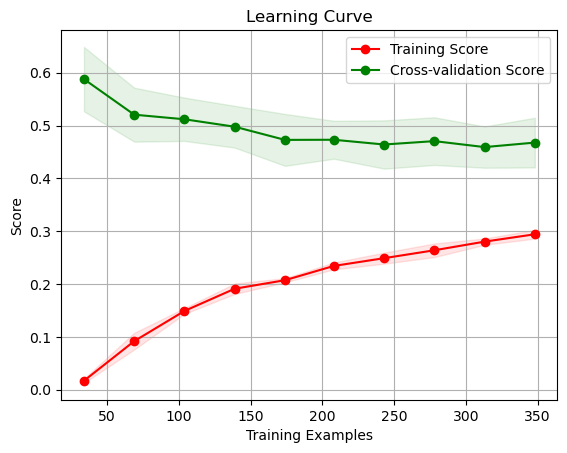

In [467]:
model = GradientBoostingRegressor()

model.fit(X_train, y_train)

scores = get_scores(model, X_train, y_train, X_test, y_test)


plot_learning_curve(model, X_train, y_train,cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring = make_scorer(mean_absolute_error, greater_is_better=True))

,Metric,Score
0,MAE,0.624698
1,MSE,0.685956
2,RMSE,0.828225
3,R2,0.526084


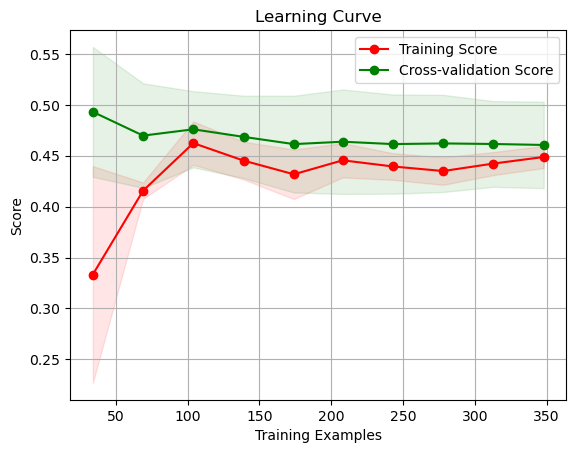

In [466]:
model2 = ARDRegression()

model2.fit(X_train, y_train)

scores = get_scores(model2, X_train, y_train, X_test, y_test)

plot_learning_curve(model, X_train, y_train,cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring = make_scorer(mean_absolute_error, greater_is_better=True))
scores

,Metric,Score
0,MAE,0.624797
1,MSE,0.688546
2,RMSE,0.829787
3,R2,0.524294


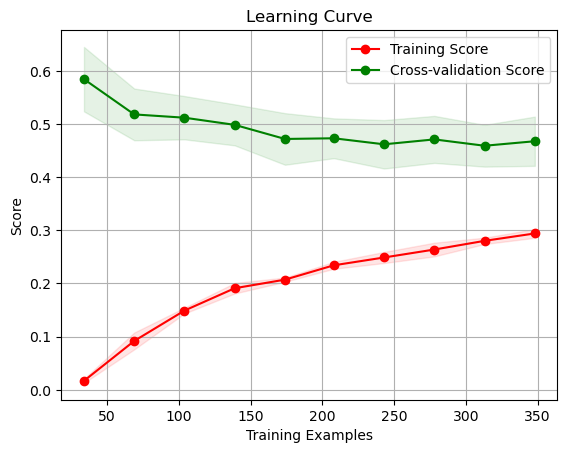

In [469]:
model3 = BayesianRidge()

model3.fit(X_train, y_train)

scores = get_scores(model3, X_train, y_train, X_test, y_test)

plot_learning_curve(model, X_train, y_train,cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring = make_scorer(mean_absolute_error, greater_is_better=True))
scores

<module 'matplotlib.pyplot' from 'c:\\Users\\khood\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

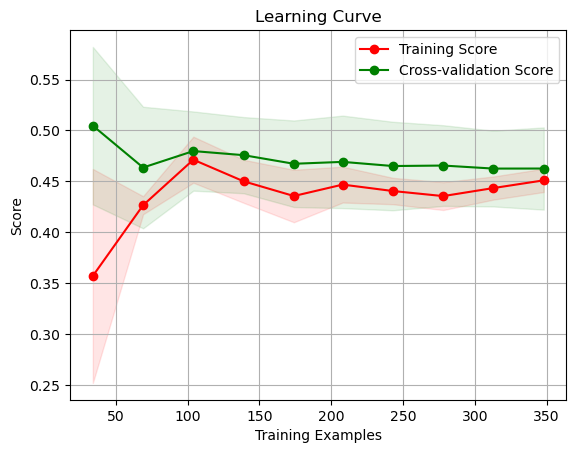

In [470]:
model = LarsCV()

model.fit(X_train, y_train)

scores = get_scores(model, X_train, y_train, X_test, y_test)

plot_learning_curve(model, X_train, y_train,cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring = make_scorer(mean_absolute_error, greater_is_better=True))

1. **Mean Squared Error (MSE):**
   - Definition: The average of the squared differences between the predicted and actual values.
   - Interpretation: It measures the average squared error of the model's predictions. Lower MSE values indicate better model performance, with 0 being the best possible score. However, MSE is sensitive to outliers due to the squared term.
   - Code: `mean_squared_error(y_true, y_pred)`

2. **Root Mean Squared Error (RMSE):**
   - Definition: The square root of the MSE.
   - Interpretation: RMSE provides an interpretable metric in the same unit as the target variable. Lower RMSE values indicate better model performance. Like MSE, it is also sensitive to outliers.
   - Code: `np.sqrt(mean_squared_error(y_true, y_pred))`

3. **Mean Absolute Error (MAE):**
   - Definition: The average of the absolute differences between the predicted and actual values.
   - Interpretation: MAE measures the average absolute error of the model's predictions. It provides a more interpretable metric than MSE and RMSE, as it is not affected by the squared term. Lower MAE values indicate better model performance.
   - Code: `mean_absolute_error(y_true, y_pred)`

4. **R^2 Score (Coefficient of Determination):**
   - Definition: The proportion of variance in the target variable explained by the model.
   - Interpretation: R^2 score represents the goodness of fit of the model to the data. It indicates the percentage of the variance in the target variable that can be explained by the model. R^2 score ranges from 0 to 1, with 1 indicating a perfect fit. However, R^2 score can be negative if the model performs worse than a horizontal line (the baseline).
   - Code: `r2_score(y_true, y_pred)`

### Scoring Metrics for Regression Models

**Mean Squared Error (MSE):**

- Definition: The average of the squared differences between the predicted and actual values.
- Interpretation: A lower MSE indicates better performance, with smaller average squared differences between predicted and actual values being desirable. The specific interpretation of a good score depends on the scale and context of the target variable.

**Root Mean Squared Error (RMSE):**

- Definition: The square root of the MSE.
- Interpretation: Similar to MSE, a lower RMSE indicates better performance. It provides an interpretable metric in the same unit as the target variable.

**Mean Absolute Error (MAE):**

- Definition: The average of the absolute differences between the predicted and actual values.
- Interpretation: Like MSE and RMSE, a lower MAE indicates better performance, with smaller average absolute differences between predicted and actual values being desirable.

**R^2 Score (Coefficient of Determination):**

- Definition: The proportion of variance in the target variable explained by the model.
- Interpretation: R^2 score ranges from 0 to 1, with 1 being the best possible score. A higher R^2 score indicates a better fit of the model to the data, with a higher percentage of the variance in the target variable explained. However, the interpretation of what constitutes a good R^2 score can vary depending on the field, problem complexity, and specific context.









`Since 3 of the models have quite similar learning curve, i will hyperparameter tune all 3 and evaluate after that.`

In [508]:
# ard_model = ARDRegression()
# bayesian_model = BayesianRidge()
# larscv_model = LarsCV()

# ard_model1 = ARDRegression()
# bayesian_model1 = BayesianRidge()
# larscv_model1 = LarsCV()

# ard_params = {'alpha_1': [1e-6, 1e-5, 1e-4],
#               'alpha_2': [1e-6, 1e-5, 1e-4],
#               'lambda_1': [1e-6, 1e-5, 1e-4],
#               'lambda_2': [1e-6, 1e-5, 1e-4]}

# bayesian_params = {'alpha_1': [1e-6, 1e-5, 1e-4],
#                    'alpha_2': [1e-6, 1e-5, 1e-4],
#                    'lambda_1': [1e-6, 1e-5, 1e-4],
#                    'lambda_2': [1e-6, 1e-5, 1e-4]}

# larscv_params = {'fit_intercept': [True, False],
#                  'normalize': [True, False]}

# scoring_metric = 'r2'

# ard_grid_search = GridSearchCV(ard_model, ard_params,scoring=scoring_metric, cv=5)
# bayesian_grid_search = GridSearchCV(bayesian_model, bayesian_params,scoring=scoring_metric,  cv=5)
# larscv_grid_search = GridSearchCV(larscv_model, larscv_params,scoring=scoring_metric,  cv=5)

# ard_grid_search.fit(X_train, y_train)
# bayesian_grid_search.fit(X_train, y_train)
# larscv_grid_search.fit(X_train, y_train)

# ard_model1.fit(X_train, y_train)
# bayesian_model1.fit(X_train, y_train)
# larscv_model1.fit(X_train, y_train)


# ard_predictions = ard_model1.predict(X_test)
# bayesian_predictions = bayesian_model1.predict(X_test)
# larscv_predictions = larscv_model1.predict(X_test)

# ard_r2 = r2_score(y_test, ard_predictions)
# bayesian_r2 = r2_score(y_test, bayesian_predictions)
# larscv_r2 = r2_score(y_test, larscv_predictions) 


# ard_best_params = ard_grid_search.best_params_
# ard_best_score = ard_grid_search.best_score_

# bayesian_best_params = bayesian_grid_search.best_params_
# bayesian_best_score = bayesian_grid_search.best_score_

# larscv_best_params = larscv_grid_search.best_params_
# larscv_best_score = larscv_grid_search.best_score_


# # Print the best hyperparameters and scores for each model
# # print("ARDRegression - Best Hyperparameters:", ard_best_params)
# print("ARDRegression - default Score:", ard_r2)
# print("ARDRegression - Best Score:", ard_best_score)
# print('Differnce:', ard_best_score - ard_r2)
# print()
# # print("BayesianRidge - Best Hyperparameters:", bayesian_best_params)
# print("BayesianRidge - default Score:", bayesian_r2)
# print("BayesianRidge - Best Score:", bayesian_best_score)
# print('Differnce:', bayesian_best_score - bayesian_r2)
# print()
# # print("LarsCV - Best Hyperparameters:", larscv_best_params)
# print("LarsCV - default Score:", larscv_r2)
# print("LarsCV - Best Score:", larscv_best_score)
# print('Differnce:', larscv_best_score - larscv_r2)

# sns.displot(x='House Area (sqm)', kde=True, height=8, data = X_train)
# plt.title("Credit Limit of Customers")
# plt.show()


In [471]:
# Instantiate the models
ard_model = ARDRegression()
huber_model = HuberRegressor()
larscv_model = LarsCV()

# Define the hyperparameters for grid search
ard_params = {'alpha_1': [1e-6, 1e-5, 1e-4],
              'alpha_2': [1e-6, 1e-5, 1e-4],
              'lambda_1': [1e-6, 1e-5, 1e-4],
              'lambda_2': [1e-6, 1e-5, 1e-4]}

huber_params = {'epsilon': [1.1, 1.2, 1.3],
                'alpha': [0.0001, 0.001, 0.01]}

larscv_params = {'fit_intercept': [True, False],
                 'normalize': [True, False]}

scoring_metric = 'r2'

# Perform grid search for each model
ard_grid_search = GridSearchCV(ard_model, ard_params, scoring=scoring_metric, cv=5)
huber_grid_search = GridSearchCV(huber_model, huber_params, scoring=scoring_metric, cv=5)
larscv_grid_search = GridSearchCV(larscv_model, larscv_params, scoring=scoring_metric, cv=5)

ard_grid_search.fit(X_train, y_train)
huber_grid_search.fit(X_train, y_train)
larscv_grid_search.fit(X_train, y_train)

# Fit the models with default hyperparameters
ard_model.fit(X_train, y_train)
huber_model.fit(X_train, y_train)
larscv_model.fit(X_train, y_train)

# Make predictions
ard_predictions = ard_model.predict(X_test)
huber_predictions = huber_model.predict(X_test)
larscv_predictions = larscv_model.predict(X_test)

# Evaluate the models using r2 score
ard_r2 = r2_score(y_test, ard_predictions)
huber_r2 = r2_score(y_test, huber_predictions)
larscv_r2 = r2_score(y_test, larscv_predictions)

# Get the best hyperparameters and scores from grid search
ard_best_params = ard_grid_search.best_params_
ard_best_score = ard_grid_search.best_score_

huber_best_params = huber_grid_search.best_params_
huber_best_score = huber_grid_search.best_score_

larscv_best_params = larscv_grid_search.best_params_
larscv_best_score = larscv_grid_search.best_score_

# Print the results
print("ARDRegression - Default Score:", ard_r2)
print("ARDRegression - Best Score:", ard_best_score)
print("Difference:", ard_best_score - ard_r2)
print()

print("HuberRegressor - Default Score:", huber_r2)
print("HuberRegressor - Best Score:", huber_best_score)
print("Difference:", huber_best_score - huber_r2)
print()

print("LarsCV - Default Score:", larscv_r2)
print("LarsCV - Best Score:", larscv_best_score)
print("Difference:", larscv_best_score - larscv_r2)

ARDRegression - Default Score: 0.5260835887105659
ARDRegression - Best Score: 0.5255241582712505
Difference: -0.0005594304393153893

HuberRegressor - Default Score: 0.5185449886756661
HuberRegressor - Best Score: 0.5287040646493326
Difference: 0.010159075973666498

LarsCV - Default Score: 0.5234703459323891
LarsCV - Best Score: 0.5286402141213438
Difference: 0.005169868188954707


***<h2>Model Improvement</h2>***

*<h4>what steps can i do</h4>*
- maybe can try regularization  
- choose a scaler that fits the model
- feature selection
- try oversampling


***<h3>HuberRegressor</h3>***

In [547]:
from sklearn.utils import shuffle

# X_shuffled, y_shuffled = shuffle(X_train, y_train, random_state=42)

# scalers = [('RobustScaler', RobustScaler()),
#            ('QuantileTransformer', QuantileTransformer()),
#            ('LogTransformer', FunctionTransformer(np.log1p, np.expm1))]

# # Create the pipeline
# pipeline = Pipeline([
#     ('scaler', None),  # Placeholder for the scaler
#     ('model', HuberRegressor())  # Your model here
# ])

# # Loop through each scaler and evaluate the model
# for scaler_name, scaler in scalers:
#     # Set the scaler in the pipeline
#     pipeline.named_steps['scaler'] = scaler
    
#     # Apply the scaler to the training data
#     X_train_scaled = scaler.fit_transform(X_shuffled)
    
#     # Perform cross-validation and compute MAE scores
#     scores = -cross_val_score(pipeline, X_train_scaled, y_shuffled, cv=5, scoring='neg_mean_absolute_error')
    
#     # Print the results
#     print(f"Scaler: {scaler_name}")
#     print("MAE Scores:", scores)
#     print("Mean MAE Score:", scores.mean())
#     print("Standard Deviation of MAE Scores:", scores.std())
#     print()

columns_to_scale = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'Stories', 'Price ($)']

# pipeline = Pipeline([
#     ('scaler', FunctionTransformer(apply_standardscaler)),
# ])

# scaled_data = pipeline.fit_transform(X_train[columns_to_scale])

# print(scaled_data)

scalers = {
    'StandardScaler': StandardScaler(),
    'Robust Scaler': RobustScaler(),
    'Log Transformation': FunctionTransformer(np.log1p, np.expm1)
}

preprocessor = ColumnTransformer(
    transformers=[(scaler_name, scaler, columns_to_scale) for scaler_name, scaler in scalers.items()]
)

scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R^2': 'r2'
}

scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'R^2': 'r2',
    'MAPE': 'neg_mean_absolute_percentage_error'

}

cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)


for metric in scoring:
    print(f"{metric}: {cv_results['test_' + metric].mean()}")

RMSE: nan
MAE: nan
MSE: nan
R^2: nan
MAPE: nan


***<h1>References</h1>***

- https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative

# Lasagna Recipe

## Ingredients:
- 1 pound (450g) ground beef
- 1 onion, finely chopped
- 3 cloves garlic, minced
- 1 can (14 ounces/400g) crushed tomatoes
- 1 can (6 ounces/170g) tomato paste
- 1/2 cup water
- 2 teaspoons dried basil
- 2 teaspoons dried oregano
- Salt and pepper to taste
- 9 lasagna noodles, cooked and drained
- 2 cups shredded mozzarella cheese
- 1 cup grated Parmesan cheese
- Fresh parsley, for garnish

## Instructions:
1. Preheat the oven to 375°F (190°C).

2. In a large skillet, cook the ground beef, onion, and garlic over medium heat until the beef is browned and the onion is tender. Drain any excess fat.

3. Add crushed tomatoes, tomato paste, water, dried basil, dried oregano, salt, and pepper to the skillet. Stir well to combine. Simmer the sauce for about 15 minutes to allow the flavors to develop.

4. In a greased 9x13-inch baking dish, spread a thin layer of the meat sauce. Place three lasagna noodles on top of the sauce. Spread a layer of meat sauce over the noodles, followed by a layer of mozzarella cheese and Parmesan cheese. Repeat the layers, ending with a layer of cheese on top.

5. Cover the baking dish with aluminum foil and bake in the preheated oven for 25 minutes. Then, remove the foil and bake for an additional 10 minutes or until the cheese is bubbly and golden.

6. Remove the lasagna from the oven and let it cool for a few minutes. Garnish with fresh parsley.

7. Slice and serve the lasagna while it's still hot and delicious!

Enjoy your homemade lasagna!